# Whatsapp Bot

In [1]:
print('''
"name": "John Doe",
    "email": "johndoe@example.com",
    "phone": "+1-234-567-8901",
    
    "education": [
        {
            "college": "University of XYZ",
            "degree": "Bachelor of Science in Computer Science",
            "start_date": "August 2013",
            "end_date": "May 2017"
        }
    ],
    
    "experiences": [
        {
            "company": "XYZ Tech Solutions",
            "title": "Software Engineer",
            "start_date": "March 2021",
            "end_date": "Present",
            "duration": "3+ years",
            "location": "[City, State]"
        },
        {
            "company": "ABC Innovations",
            "title": "Full-Stack Developer",
            "start_date": "June 2017",
            "end_date": "February 2021",
            "duration": "3+ years",
            "location": "[City, State]"
        }
    ],
    
    "summary": "An experienced software developer with 5+ years of experience in developing full-stack web applications, looking to leverage my skills in [specific technology/field] to contribute to a dynamic team and deliver innovative solutions.",
    
    "skills": [
        "Python",
        "JavaScript",
        "HTML",
        "CSS",
        "SQL",
        "C++",
        "Django",
        "Flask",
        "React",
        "Vue.js",
        "Node.js",
        "Express.js",
        "MySQL",
        "PostgreSQL",
        "MongoDB",
        "Docker",
        "Jenkins",
        "Git",
        "GitHub",
        "JIRA",
        "AWS",
        "Heroku"
    ],
    
    "Certifications or Honor-Awards": [
        {
            "certificate_title": "Certified Python Developer",
            "certificate_provider": "Python Institute"
        },
        {
            "certificate_title": "AWS Certified Solutions Architect",
            "certificate_provider": "Amazon Web Services"
        }
''')


"name": "John Doe",
    "email": "johndoe@example.com",
    "phone": "+1-234-567-8901",
    
    "education": [
        {
            "college": "University of XYZ",
            "degree": "Bachelor of Science in Computer Science",
            "start_date": "August 2013",
            "end_date": "May 2017"
        }
    ],
    
    "experiences": [
        {
            "company": "XYZ Tech Solutions",
            "title": "Software Engineer",
            "start_date": "March 2021",
            "end_date": "Present",
            "duration": "3+ years",
            "location": "[City, State]"
        },
        {
            "company": "ABC Innovations",
            "title": "Full-Stack Developer",
            "start_date": "June 2017",
            "end_date": "February 2021",
            "duration": "3+ years",
            "location": "[City, State]"
        }
    ],
    
    "summary": "An experienced software developer with 5+ years of experience in developing full-stack web applicat

In [44]:
import getpass
import os


def _set_if_undefined(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"Please provide your {var}")


_set_if_undefined("OPENAI_API_KEY")
_set_if_undefined("LANGCHAIN_API_KEY")
_set_if_undefined("GOOGLE_API_KEY")
# _set_if_undefined("TAVILY_API_KEY")

# Optional, add tracing in LangSmith
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "Whatsapp Bot"
print("done")

done


# Helper functions

In [45]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder


def create_agent(llm, tools, system_message: str):
    """Create Agent"""
    prompt = ChatPromptTemplate.from_messages(
        [
            ("system", system_message),
            MessagesPlaceholder("cv_details"),
            MessagesPlaceholder("current_jd"),
            MessagesPlaceholder("messages"),
        ]
    )

    if not tools:
        # without tools, we can't bind tools
        return prompt | llm

    prompt = prompt.partial(tool_names=", ".join([tool.name for tool in tools]))
    return prompt | llm.bind_tools(tools)

## Agent State

In [46]:
import operator
from langchain_core.messages import BaseMessage
from typing import TypedDict, Annotated, Sequence


class AgentState(TypedDict):
    cv_details: str
    current_jd: str
    new_jd: str
    extracted_details: str
    messages: Annotated[Sequence[BaseMessage], operator.add]

    next: str

In [47]:
from langchain_core.messages import AIMessage


def agent_node(state, agent, name):
    """Agent node, call ai"""
    res = agent.invoke(state)
    print("***** res", res)
    return {
        "messages": [AIMessage(**res.dict(exclude={"type", "name"}), name=name)],
    }


## Tools

In [48]:
database_path = "C:/Users/Jonathan Khawbs/Desktop/example.db"

In [49]:
# #####################
# ###############################
# ##############
# import sqlite3
# from typing import List, Dict, Union

# @tool
# def db_query_engine(sql: str, database_path: str) -> Union[List[Dict], Dict]:
#     """
#     Query the JD database to get the JD related information.
    
#     :param sql: A valid SQL query string.
#     :param database_path: Path to the SQLite database file.
#     :return: List of dictionaries representing the query result rows, or an empty list if no result.
#     """
#     print("***** SQL:", sql)
#     data = []
#     try:
#         conn = sqlite3.connect(database_path)
#         cursor = conn.cursor()
#         cursor.execute(sql)
#         result = cursor.fetchall()
        
#         if result:
#             # Convert the result into a list of dictionaries
#             column_names = [description[0] for description in cursor.description]
#             data = [dict(zip(column_names, row)) for row in result]

#         cursor.close()
#     except sqlite3.Error as e:
#         print(f"SQLite error: {e}")
#     finally:
#         if conn:
#             conn.close()
    
#     return data
# #################################################
# #################
# ########

In [50]:
from langchain_core.tools import tool
import sqlite3


@tool
def db_query_engine(sql: str):
    """
    Use this function to query the JD database to get the JD related information.
    :param sql: valid sql query
    :return: List or Dict based on the query
    """
    print("***** SQL", sql)
    conn = sqlite3.connect(database_path)
    cursor = conn.cursor()
    cursor.execute(sql)
    result = cursor.fetchall()
    data = []
    if result:
        # IF data is available, convert it into list of dictionaries
        column_names = [description[0] for description in cursor.description]
        data = [dict(zip(column_names, row)) for row in result]

    cursor.close()
    conn.close()
    return data

# jd_db_query_engine("SELECT * FROM jd")

In [51]:
@tool
def confirmation_engine(cv_details: dict, extracted_details: dict, new_jd: dict):
    """
    Use this function to confirm the details extracted from the CV and the new JD.
    :param cv_details: Details extracted from the CV
    :param extracted_details: Details extracted from the JD
    :param new_jd: New JD
    :return: True if the details are correct, False otherwise
    """
    
    # Correcting the typo in the variable name from 'extracted_detials' to 'extracted_details'
    input_msg = (
        f"Do you approve of the following details?\n\n{extracted_details}\n\n"
        "Anything except 'Y'/'Yes' (case-insensitive) will be treated as a no."
    )
    # Using raw_input instead of input for Python 2 compatibility
    try:
        resp = input(input_msg).lower()
    except NameError:  # Handling Python 3 input function
        resp = input(input_msg).lower()

    if resp not in ("yes", "y"):
        print("Tool invocations not approved.")
        return False

    print("Details confirmed.")
    return True


In [52]:
pip install langchain_google_genai    

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


## Agents

In [53]:

from langchain_google_genai import ChatGoogleGenerativeAI

# llm = ChatOpenAI(model="gpt-3.5-turbo-0125", temperature=0.0)
llm = ChatGoogleGenerativeAI(model="gemini-1.5-pro", temperature=0.0)


In [54]:
import functools

master_prompt = """
You are a recruiter tasked with finding best candidates for a job opening. You are talking with candidate via chatting platform.
You have the following details:
- CV Details: (cv_details)
- Current Job Description: (current_jd)
- History of messages: (messages)

Task 1:
You need to ask the candidate for the following details:

1. Ask for latest CV from the candidate. And consider this CV as the new CV. 

2.If candidate CV and job description does not match at all, suggest candidate another relevant job from the database using db_query_engine tool.
Tell candidate about the job description of the other job and ask if the candidate is interested or not.

3. If candidate is interested, question will be asked by QNA agent.

4. If candidate is talking about off topic, motivate them to talk about the job opening.

5. If candidate ask about other roles or opportunities, search from database using db_query_engine tool and inform the candidate. If nothing found related to interest of candidate, then say no such opportunity or job is available.

6. If candidate is not interested at all after trying suggestions and pursuing, just end the conversation and wish him luck.

7. Chech from the history of message and only after question and answer is done ask the following questions :
   Ask his/her's expected salary, Ask for the notice period, Ask for the location preference and store in chat history. 
   Recognize this informaition and reply to candidate. 

"""

master_agent = create_agent(llm, [db_query_engine, confirmation_engine], master_prompt)
master_node = functools.partial(agent_node, agent=master_agent, name="master")


In [55]:
import functools

jd_comparison_prompt = """
You are a recruiter tasked with comparing with current jd and candidate shared cv.
You have the following details:
- CV Details: (cv_details)
- Current Job Description: (current_jd)
- History of messages: (messages)

Lets work step by step:
1. Extract the details from the CV and compare with the current JD.
2. Compare JD skills with the CV skills
3. Compare JD experience with the CV experience
4. Compare JD education with the CV education
5. After comparing, share the final details

"""

jd_comparison_agent = create_agent(llm, [], jd_comparison_prompt)
jd_comparison_node = functools.partial(agent_node, agent=jd_comparison_agent, name="jd_comparison_agent")


In [56]:
qna_prompt ="""
You have the following details:
- CV Details: (cv_details)
- Current Job Description: (current_jd)
- History of messages: (messages)

You are a recruiter tasked with asking indepth question to candidate.
You have to ask one question at a time if candidate is interested:

do these tasks step by step:

1. extract only the skills and projects from the CV.     
2. prepare 4-5 medium level questions on the projects and skills such that by checking the answers we can validate that the candidate has really done the project and knows the skills he has written.
3. evaluate the answers given by candidate and keep making a summary as extracted details of candidate.
"""
qna_agent = create_agent(llm, [], qna_prompt)
qna_node= functools.partial(agent_node, agent=qna_agent, name="QNA")

In [57]:
from langgraph.prebuilt import ToolNode

tools = [db_query_engine, confirmation_engine]
tool_node = ToolNode(tools)

In [58]:
# import functools

# jd_comparison_prompt = """
# You are a recruiter tasked with comparing with current jd and candidate shared cv.
# You have the following details:
# - CV Details: (cv_details)
# - Current Job Description: (current_jd)
# - History of messages: (messages)

# Lets work step by step:
# 1. Extract the details from the CV and compare with the current JD.
# 2. Compare JD skills with the CV skills
# 3. Compare JD experience with the CV experience
# 4. Compare JD education with the CV education
# 5. After comparing, share the final details

# At the end add FINAL ANSWER in the message content.
# """

# jd_comparison_agent = create_agent(llm, [], jd_comparison_prompt)
# jd_comparison_node = functools.partial(agent_node, agent=jd_comparison_agent, name="jd_comparison_agent")


In [59]:

from langchain_core.tools import Tool

# Either agent can decide to end

members = ["MASTER","JD_COMPARISION","QNA"]
system_prompt = (
    
    '''
    You have the following details:
   - CV Details: (cv_details)
   - Current Job Description: (current_jd)
   - History of messages: (messages)
     You are a recruiter supervisor tasked with managing a conversation between the
     following workers:  {members}. Given the following user request,
     respond with the worker to act next. Each worker will perform a
     task and respond with their results and status. 
     
     If candidate is interested in the roll. QNA agent will take action of asking some questions and then back to master.
    When the conversation ends, and all neccessary information of candidate is known by asking questions, human validation by calling confirmation_engine tool'''
    
)

options =["FINISH"] + members

prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        MessagesPlaceholder(variable_name="messages"),
        # HumanMessage("Given the conversation above, who should act next?, Or should we FINISH? Select one of: {options}"),
        (
            "user",
            "Select one of: {options} "
            "the flow will be like : General questions from master agent, question and answers by QNA agent, ask salary expectations by master then human confirmation, FINISH.",
        ),
    ]
).partial(options=str(options), members=", ".join(members))

# Define the function (tool) configuration
# def route_tool(params):
#     print("***** params: route_tool", params)
#     next_role = params.get("next")
#     return {"next": next_role}


route_tool = Tool(
    name="route",
    func=lambda params: {params.get("next", "MASTER")},
    description="Select the next role.",
    parameters={
        "title": "routeSchema",
        "type": "object",
        "properties": {
            "next": {
                "title": "Next",
                "anyOf": [
                    {"enum": options},
                ],
            }
        },
        "required": ["next"],
    },
)


def parser(params):
    tool_call = params.dict().get("tool_calls")

    next_dest = "MASTER"

    if tool_call:
        print("***** tool_call", tool_call)
        print("***** tool_call[0].get('args').value", tool_call[0].get("args"))
        print("***** tool_call[0].get('args').values()", tool_call[0].get("args").values())
        next_dest = list(tool_call[0].get("args").values())[-1]

    content = params.content.strip().upper()
    if content:
        next_dest = content

    return {"next": next_dest}



supervisor_chain = (
        prompt
        | llm.bind_tools(tools=[route_tool])
        | parser
)

In [60]:
# valid_prompt = """
# You are a validation agent.
# just need to confirm the human response. 

# This validation is required when all the details of the candidate is gathered and the conversation between candidate and chatbot has come to an end.
# In between the conversation, this set of validation by human is not required.
# """
# valid_agent = create_agent(
#     llm,
#     [],
#     valid_prompt
# )
# valid_node = functools.partial(agent_node, agent = valid_agent, name = "VALID")

In [61]:
from langchain_core.runnables import ensure_config


def candidate_info(state: AgentState):
    config = ensure_config()
    configuration = config.get("configurable", {})
    cid = configuration.get("cid", "")
    jd_id = configuration.get("jd_id", "")

    # check already available in agent state
    if state.get("cv_details") and state.get("current_jd"):
        return state

    if not cid or not jd_id:
        raise ValueError("Please provide cid and jd_id in the configuration")

    cv_details: dict = {
        "cid": cid,
        "name": "John Doe",
        "skills": "Python, Java, C++",
        "experience": "Data Scientist at Google (2015-2020)",
        "education": "B.Tech from IIT (2015)",
    }
    current_jd: dict = {
        "jd_id": jd_id,
        "skills": "Python, Java, C++",
        "years_of_experience": "5+",
        "designation": "Data Scientist",
    }

    print("***** cv_details", cv_details)

    return {
        "cv_details": [f"{cv_details}"],
        "current_jd": [f"{current_jd}"],
    }

In [62]:
from langgraph.graph import StateGraph, END
from langgraph.checkpoint.sqlite import SqliteSaver
workflow = StateGraph(AgentState)
# workflow.add_node("recruiter_approval", )
workflow.add_node("candidate_info", candidate_info)
workflow.add_node("MASTER", master_node)
workflow.add_node("QNA",qna_node)
# workflow.add_node("VALID", valid_node)
# workflow.add_node("HUMAN_APPROVAL", human_approval)
# workflow.add_node("JD_COMPARISON_AGENT", jd_comparison_node)
workflow.add_node("supervisor", supervisor_chain)
workflow.add_edge("candidate_info", "supervisor")
workflow.add_edge("QNA", "supervisor")
workflow.add_edge("MASTER", "supervisor")



# workflow.add_edge("VALID","supervisor")

memory = SqliteSaver.from_conn_string("state.db")

workflow.add_conditional_edges(
    "supervisor",
    lambda state: state.get("next", "master"),
    {
        "MASTER": "MASTER",
        "QNA": "QNA",
#         "VALID": "VALID",
        "FINISH": END,
    }
)


workflow.set_entry_point("candidate_info")
graph = workflow.compile(checkpointer=memory, interrupt_before = ["supervisor"])

In [63]:
from langchain_core.messages import HumanMessage

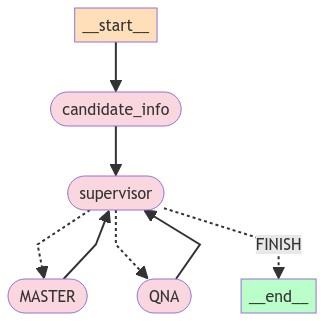

In [64]:
from IPython.display import Image, display
  
display(Image(graph.get_graph().draw_mermaid_png()))

In [65]:
import uuid

thread_id = str(uuid.uuid4())

config = {
    "configurable": {
        # The passenger_id is used in our flight tools to
        # fetch the user's flight information
        "cid": "2",
        "jd_id": "1",
        # Checkpoints are accessed by thread_id
        "thread_id": thread_id,
    },
    "recursion_limit": 10
}

In [66]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="hello my name is John"),
            ]
        },
        config,

):
    print(s)

***** cv_details {'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}
{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"]}}


In [67]:
# #MASTER ROLE
# 1. interviewer role(ask cv, ctc, notice period, pref location) 
# 2. jd recommendation ()
# 3. application status. (general questions.)

In [68]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content='''"name": "John Doe",
        "skills": "Python, Java, C++",
        "experience": "Data Scientist at Google (2015-2020)",
        "education": "B.Tech from IIT (2015)"'''),
            ]
        },
        config,

):
    print(s)
    
#asking for latest CV.

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), HumanMessage(content='"name": "John Doe",\n        "skills": "Python, Java, C++",\n        "experience": "Data Scientist at Google (2015-2020)",\n        "education": "B.Tech from IIT (2015)"')], 'next': None}}


In [69]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="Yes."),
            ]
        },
        config,

):
    
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), HumanMessage(content='"name": "John Doe",\n        "skills": "Python, Java, C++",\n        "experience": "Data Scientist at Google (2015-2020)",\n        "education": "B.Tech from IIT (2015)"'), HumanMessage(content='hello my name is John'), HumanMessage(content='"name": "John Doe",\n        "skills": "Python, Java, C++",\n        "experience": "Data Scientist at Google (2015-2020)",\n        "education": "B.Tech from IIT (2015)"'), HumanMessage(content='Yes.')], 'next': None}}


In [70]:
#trying to change topic.
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="30 LPA,4 years from now, bangalore."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), HumanMessage(content='"name": "John Doe",\n        "skills": "Python, Java, C++",\n        "experience": "Data Scientist at Google (2015-2020)",\n        "education": "B.Tech from IIT (2015)"'), HumanMessage(content='hello my name is John'), HumanMessage(content='"name": "John Doe",\n        "skills": "Python, Java, C++",\n        "experience": "Data Scientist at Google (2015-2020)",\n        "education": "B.Tech from IIT (2015)"'), HumanMessage(content='Yes.'), HumanMessage(content='hello my name is John'), HumanMessage(content='"name": "John Doe",\n        "skills":

In [121]:

for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="what is further upadate."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


***** res content="I'm waiting to hear back from you, John. Are you interested in exploring other opportunities? \n" response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-db0d20c1-f6c5-4ce9-8d02-f40568beb3ac-0'
{'MASTER': {'messages': [AIMessage(content="I'm waiting to hear back from you, John. Are you interested in exploring other opportunities? \n", response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIG

In [40]:

for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="yes. sure"),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

***** res content='Could you please tell me your notice period in weeks? \n' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-08ff8347-cdf4-4876-99a6-128e070c4f22-0'
{'MASTER': {'messages': [AIMessage(content='Could you please tell me your notice period in weeks? \n', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability

In [41]:

for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="28 weeks."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

***** res content='What is your preferred location for this role, John? \n' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-7da3783d-fb1f-45fb-9efa-a906018d4af8-0'
{'MASTER': {'messages': [AIMessage(content='What is your preferred location for this role, John? \n', response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability':

In [42]:

for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="bangalore."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

***** res content='So, you are looking for a Software Engineer role in Bangalore with an expected salary of 30 LPA after 4 years, and your notice period is 28 weeks. Is that correct? \n' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-61258548-a37e-42aa-8e84-ee4196740ad4-0'
{'MASTER': {'messages': [AIMessage(content='So, you are looking for a Software Engineer role in Bangalore with an expected salary of 30 LPA after 4 years, and your notice period is 28 weeks. Is that correct? \n', response_metadata={'prompt_feedback': {'block_reason': 

In [43]:

for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="Yes."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

***** res content='Great! I will pass your information along to the hiring manager for the Software Engineer role. They will be in touch soon to discuss the next steps in the process. \n' response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-1d3e6c42-110e-4f3e-a754-2936d07cc8b8-0'
{'MASTER': {'messages': [AIMessage(content='Great! I will pass your information along to the hiring manager for the Software Engineer role. They will be in touch soon to discuss the next steps in the process. \n', response_metadata={'prompt_feedback': {'block_reason'

In [122]:
#PREVIOUS CHATS..

In [123]:
for s in graph.stream(
        {
            "messages": [
                        HumanMessage(content="use libraries such as scikit-learn, statsmodels, or NumPy. Scikit-learn is popular for its simplicity and efficiency, making it suitable for straightforward implementations. Statsmodels offers more detailed statistical parameters, ideal for when you need advanced analysis. Both approaches are valuable, with scikit-learn preferred for consistency across regression techniques and statsmodels for detailed statistical insights. The process involves importing necessary libraries, preparing your data, splitting it into training and testing sets, creating and training the linear regression model, making predictions, and finally evaluating the model's performance using metrics like Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²). Visualization tools like matplotlib can also be employed to plot the data and the best-fitted line, enhancing the understanding of the model's behavior"),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

***** res content="John, I understand you're knowledgeable about data science techniques like linear regression. However, I'm here to discuss your career prospects. \n\nAre you interested in exploring other job opportunities that might be a better fit for you at this time? \n" response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-f4063a7b-7675-4ebd-a645-ab6fc109ed6b-0'
{'MASTER': {'messages': [AIMessage(content="John, I understand you're knowledgeable about data science techniques like linear regression. However, I'm here to discuss your caree

In [124]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content=" Three common techniques for converting categorical variables into numerical form are one-hot encoding, label encoding, and binary encoding."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 8.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 16.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 32.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..


***** res content="That's correct, John. You clearly have a good grasp of data science concepts. \n\nLet's focus on your job search. Are you open to exploring other opportunities, or should we end our conversation for now? \n" response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-6a4d9445-15cf-4f56-8ef9-b57935c40c11-0'
{'MASTER': {'messages': [AIMessage(content="That's correct, John. You clearly have a good grasp of data science concepts. \n\nLet's focus on your job search. Are you open to exploring other opportunities, or should we end our co

In [125]:
# for s in graph.stream(
#         {
#             "messages": [
#                 HumanMessage(content="Is there any other job available?"),
#             ]
#         },
#         config,

# ):
#     print(s)

In [126]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="30 LPA, 26 november 2024, hyderabad."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

***** res content="You mentioned a notice period of 26 November 2024, which is quite far out. Most companies are looking for candidates who can join sooner. \n\nLet's explore other opportunities. Are you interested in roles with a quicker start date, or perhaps different locations? \n" response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'safety_ratings': [{'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE', 'blocked': False}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability': 'NEGLIGIBLE', 'blocked': False}]} id='run-4d568d77-c66e-4e27-a579-550f8454e325-0'
{'MASTER': {'messages': [AIMessage(content="You mentioned a notice period of 26 November 2024, which is quite far out. Most companies are looking for candidates who can

In [127]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="2 years from joining date."),
            ]
        },
        config,

):
    print(s)

{'candidate_info': {'cv_details': ["{'cid': '2', 'name': 'John Doe', 'skills': 'Python, Java, C++', 'experience': 'Data Scientist at Google (2015-2020)', 'education': 'B.Tech from IIT (2015)'}"], 'current_jd': ["{'jd_id': '1', 'skills': 'Python, Java, C++', 'years_of_experience': '5+', 'designation': 'Data Scientist'}"], 'new_jd': None, 'extracted_details': None, 'messages': [HumanMessage(content='hello my name is John'), AIMessage(content="Hello John, It's nice to connect with you. Could you please share your latest CV? \n", response_metadata={'finish_reason': 'STOP', 'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'safety_ratings': [{'blocked': False, 'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_HARASSMENT', 'probability': 'NEGLIGIBLE'}, {'blocked': False, 'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'p

Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 2.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 4.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 8.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 16.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<locals>._chat_with_retry in 32.0 seconds as it raised ResourceExhausted: 429 Resource has been exhausted (e.g. check quota)..
Retrying langchain_google_genai.chat_models._chat_with_retry.<l

KeyboardInterrupt: 

In [ ]:
for s in graph.stream(
        {
            "messages": [
                HumanMessage(content="when can i get the interview?"),
            ]
        },
        config,

):
    print(s)

In [ ]:
# for s in graph.stream(
#         {
#             "messages": [
#                 HumanMessage(content="I would want to know more about the job."),
#             ]
#         },
#         config,

# ):
#     print(s)

In [ ]:
# for s in graph.stream(
#         {
#             "messages": [
#                 HumanMessage(content="tell me more about this position."),
#             ]
#         },
#         config,

# ):
#     print(s)

In [ ]:
# for s in graph.stream(
#         {
#             "messages": [
#                 HumanMessage(content="Day to day responsibilities."),
#             ]
#         },
#         config,

# ):
#     print(s)

In [ ]:
# for s in graph.stream(
#         {
#             "messages": [
#                 HumanMessage(content="Just tell me what you know man."),
#             ]
#         },
#         config,

# ):
#     print(s)

In [ ]:
sqlite3 myDatabase.db

In [ ]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect("C:/Users/Jonathan Khawbs/Desktop/example.db")

# Create a cursor object
cursor = conn.cursor()

# Get a list of all table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Iterate through each table and print all data
for table in tables:
    table_name = table[0]
    print(f"\nPrinting data from table: {table_name}")
    cursor.execute(f"SELECT * FROM {table_name};")
    rows = cursor.fetchall()
    for row in rows:
        print(row)

# Close the connection
conn.close()


In [ ]:
import sqlite3
import os
# Connect to the SQLite database (it will be created if it doesn't exist)
conn = sqlite3.connect("C:/Users/Jonathan Khawbs/Desktop/example.db")

# Create a cursor object using the cursor() method
cursor = conn.cursor()

# Create table



# Commit the transaction
conn.commit()

# Query data
# cursor.execute("data architechture")
cursor.execute("SELECT * FROM skills")
rows = cursor.fetchall()

for row in rows:
    print(row)

# Close the connection
conn.close()
